# Experimento: MNIST

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from src.network import NeuralNetwork
from src.optimizers import Adam, SGD
from src.trainer import Trainer
from src.utils import (
    split_data, one_hot, fit_minmax, transform_minmax, accuracy,
    plot_curves, confusion_matrix, plot_confusion_matrix, show_predictions
)

In [7]:
from data.mnist_loader import download_and_load_mnist

X, y = download_and_load_mnist(data_subdir="mnist", cache_npz=True)
num_classes = 10

(X_train, y_train), (X_val, y_val), (X_test, y_test) = split_data(
    X, y, train_ratio=0.6, val_ratio=0.2, test_ratio=0.2, random_seed=42, shuffle=True
)

y_train_oh = one_hot(y_train, num_classes)
y_val_oh   = one_hot(y_val,   num_classes)
y_test_oh  = one_hot(y_test,  num_classes)

print('Train:', X_train.shape, 'Val:', X_val.shape, 'Test:', X_test.shape)

Train: (42000, 784) Val: (14000, 784) Test: (14000, 784)


Epoch 001 | loss 0.3561 | acc 0.9033 | val_loss 0.2024055290233254 | val_acc 0.9457857142857143
Epoch 002 | loss 0.1653 | acc 0.9566 | val_loss 0.15464430711018654 | val_acc 0.9565714285714285
Epoch 003 | loss 0.1186 | acc 0.9690 | val_loss 0.12363916760183385 | val_acc 0.965
Epoch 004 | loss 0.0914 | acc 0.9778 | val_loss 0.10948547291667192 | val_acc 0.9700714285714286
Epoch 005 | loss 0.0751 | acc 0.9820 | val_loss 0.11269267806884462 | val_acc 0.9677857142857142
Epoch 006 | loss 0.0645 | acc 0.9850 | val_loss 0.1063467219055622 | val_acc 0.9702857142857143
Epoch 007 | loss 0.0530 | acc 0.9880 | val_loss 0.09536610471969029 | val_acc 0.9722142857142857
Epoch 008 | loss 0.0447 | acc 0.9907 | val_loss 0.09377895696324154 | val_acc 0.9750714285714286
Epoch 009 | loss 0.0386 | acc 0.9924 | val_loss 0.09339487593298335 | val_acc 0.9747857142857143
Epoch 010 | loss 0.0379 | acc 0.9915 | val_loss 0.10375620161202434 | val_acc 0.9727857142857143
Epoch 011 | loss 0.0362 | acc 0.9931 | val_lo

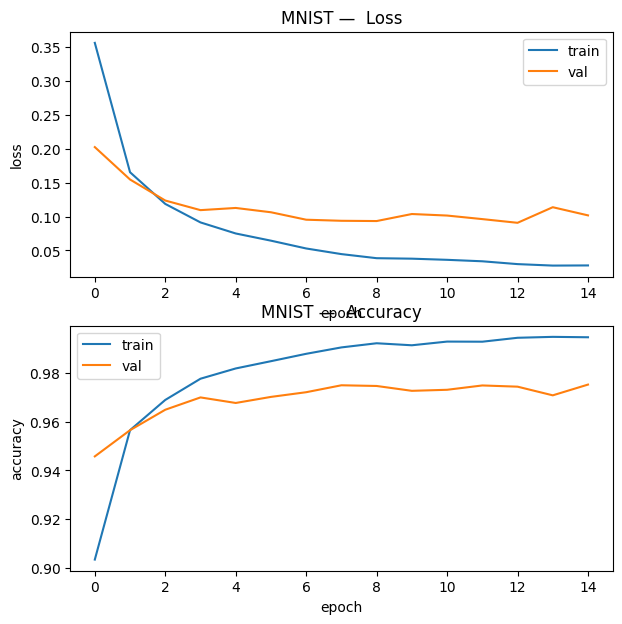

In [8]:
architecture = [784, 256, 128, 10]
activations = ['relu', 'relu', 'softmax']
optimizer = Adam(lr=1e-3)

net = NeuralNetwork(architecture, activations)
trainer = Trainer(net, optimizer, loss='cross_entropy')

history = trainer.train(
    X_train, y_train_oh,
    X_val=X_val, y_val=y_val_oh,
    epochs=15,
    batch_size=128,
    classification=True,
    verbose=True
)

plot_curves(history, title_prefix='MNIST — ')

Accuracy en test: 0.9752142857142857


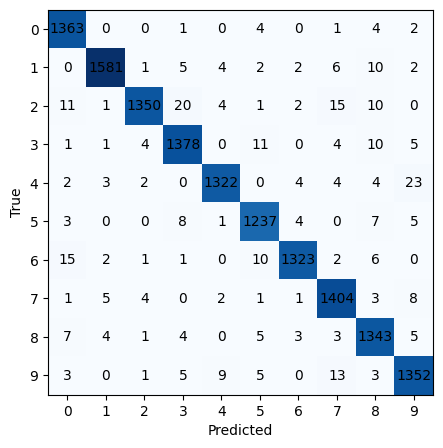

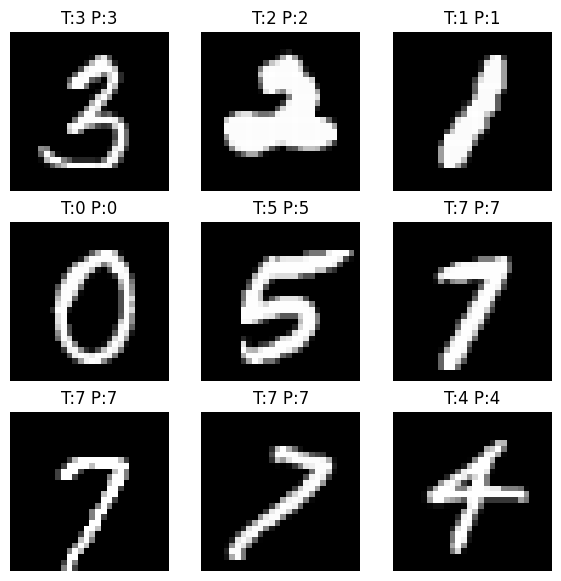

In [9]:
probs_test = net.forward(X_test)
test_acc = accuracy(y_test_oh, probs_test)
y_pred = np.argmax(probs_test, axis=1)
cm = confusion_matrix(y_test_oh, probs_test, num_classes)
print('Accuracy en test:', float(test_acc))
plot_confusion_matrix(cm, [str(i) for i in range(10)])
show_predictions(X_test[:9], np.argmax(y_test_oh[:9],1), np.argmax(probs_test[:9],1), [str(i) for i in range(10)])